### KNN Algorithms(K Nearest Neighbors)

In [111]:
from sklearn.neighbors import KNeighborsClassifier

#### KNN classifier implementation

In [112]:
x_train = [[0], [1], [2], [3]]
# features, must be 2-dimensional 
y_train= [0, 0, 1, 1]
# labels
x_test = [[5]]

In [113]:
estimator = KNeighborsClassifier(n_neighbors = 2)
# estimator: model
# In KNN algorithm, the distance is derived using Euclidean distance by default
estimator.fit(x_train, y_train)
# input features and labels from test_set 

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [114]:
y_pre = estimator.predict(x_test)
print(f'predicted value is {y_pre}')

predicted value is [1]


#### KNN regression implementation

In [115]:
from sklearn.neighbors import KNeighborsRegressor

In [116]:
x_train = [[0, 0, 1], [1, 1, 0], [3, 10, 10], [4, 11, 12]] # x_train: features
y_train = [0.1, 0.2, 0.3, 0.4] # y_train: labels
x_test = [[3, 11, 10]]

| Sample | Feature 1 | Feature 2 | Feature 3 | Label (y_train) |
| :----- | :-------- | :-------- | :-------- | :-------------- |
| 1      | 0         | 0         | 1         | 0.1             |
| 2      | 1         | 1         | 0         | 0.2             |
| 3      | 3         | 10        | 10        | 0.3             |
| 4      | 4         | 11        | 12        | 0.4             |


In [117]:
estimator = KNeighborsRegressor(n_neighbors = 2)
estimator.fit(x_train, y_train)
y_pre = estimator.predict(x_test)
print(y_pre)
# average of 0.3 and 0.4

[0.35]


#### Feature Preprocessing - Normalization

In [118]:
from sklearn.preprocessing import MinMaxScaler

Normalization, math formula by default 
$$
x' = \frac{x - x_{min}}{max - min}
$$

In [119]:
x_train = [[90, 2, 10, 40], 
           [60, 4, 15, 45],
           [75, 3, 13, 46]]

# create transform object
transfer = MinMaxScaler(feature_range = (0, 1))
# Normalization range(0, 1) inclusive by feault
x_train_new = transfer.fit_transform(x_train)

In [120]:
print(x_train_new)

[[1.         0.         0.         0.        ]
 [0.         1.         1.         0.83333333]
 [0.5        0.5        0.6        1.        ]]


#### Feature preprocessing - Standardization 

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
x_train = [[90, 2, 10, 40], 
           [60, 4, 15, 45],
           [75, 3, 13, 46]]
transfer = StandardScaler()
x_train_new = transfer.fit_transform(x_train)
print(x_train_new)

[[ 1.22474487 -1.22474487 -1.29777137 -1.3970014 ]
 [-1.22474487  1.22474487  1.13554995  0.50800051]
 [ 0.          0.          0.16222142  0.88900089]]


Here, the `StandardScaler` object stores the value of test set.

In [123]:
print(transfer.var_)
print(transfer.mean_)
print(transfer.scale_)

[150.           0.66666667   4.22222222   6.88888889]
[75.          3.         12.66666667 43.66666667]
[12.24744871  0.81649658  2.05480467  2.62466929]


#### Iris Dataset Case Analysis

Machine Learning Steps:
1. Load Data
2. Data Preprocessing
3. Feature Engineering
4. Model Training
5. Model Evaluation
6. Model Prediction

In [124]:
# Import Package first
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### Notice
Here we import the package `train_test_split`, never used before, and this package actually reveals the process of machine learning: 
- Everytime you train the model, you do not give the `x_train`, `y_train`, `x_test`, `y_test` separately. Instead, you give the model an entire dataset
- Then using `train_test_split` to specify the proportion of `x_test_size`, as we mentioned before, 2:8 or 3:7
- The `train_test_split` package will automatically hide `y_test` from training the data
- After training the model, you can use `model.score(x_test, y_test)` to evaluate the model, which was calculated by skitlearn.

In [125]:
import pandas as pd
# as_frame is a function inside skitlearn package
# as_frame = False by default
# as_frame = True, so skitlearn will automatically transfer the data into dataframe
iris_data = load_iris(as_frame=True)
# it returns a Bunch Object
df = pd.DataFrame(iris_data.frame)
# .frame to convert it into pandas dataframe form 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [126]:
# Then we can play the data
print(df['target'].value_counts())
print(f'shape is {df.shape}')

target
0    50
1    50
2    50
Name: count, dtype: int64
shape is (150, 5)


In [127]:
df.groupby('target').median().rename(columns = {
    'sepal length (cm)': 'median sepal length (cm)', 
    'sepal width (cm)': 'median sepal width (cm)',
    'petal length (cm)': 'median petal length (cm)', 
    'petal width (cm)': 'median petal width (cm)'
})

,median sepal length (cm),median sepal width (cm),median petal length (cm),median petal width (cm)
target,,,,
0,5.0,3.4,1.50,0.2
1,5.9,2.8,4.35,1.3
2,6.5,3.0,5.55,2.0


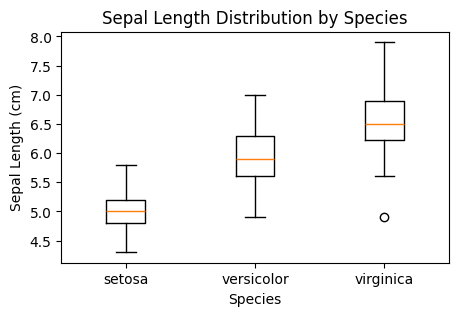

In [128]:
plt.figure(figsize=(5, 3))

data_to_plot = [df[df['target'] == i]['sepal length (cm)'] for i in range(3)]

plt.boxplot(data_to_plot, tick_labels = iris_data.target_names)
plt.title('Sepal Length Distribution by Species')
plt.ylabel('Sepal Length (cm)')
plt.xlabel('Species')
plt.show()

##### Finished Playing with Data, time to back to machine learning

In [129]:
iris = load_iris()
print(iris.keys())
print(f'data from row 0 to 5: {iris.data[0:5]}')
print(f'target names: {iris.target_names}')
print(f'feature names: {iris.feature_names}')

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
data from row 0 to 5: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
target names: ['setosa' 'versicolor' 'virginica']
feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  label
0                  5.1               3.5  ...               0.2      0
1                  4.9               3.0  ...               0.2      0
2                  4.7               3.2  ...               0.2      0
3                  4.6               3.1  ...               0.2      0
4                  5.0               3.6  ...               0.2      0
..                 ...               ...  ...               ...    ...
145                6.7               3.0  ...               2.3      2
146                6.3               2.5  ...               1.9      2
147                6.5               3.0  ...               2.0      2
148                6.2               3.4  ...               2.3      2
149                5.9               3.0  ...               1.8      2

[150 rows x 5 columns]


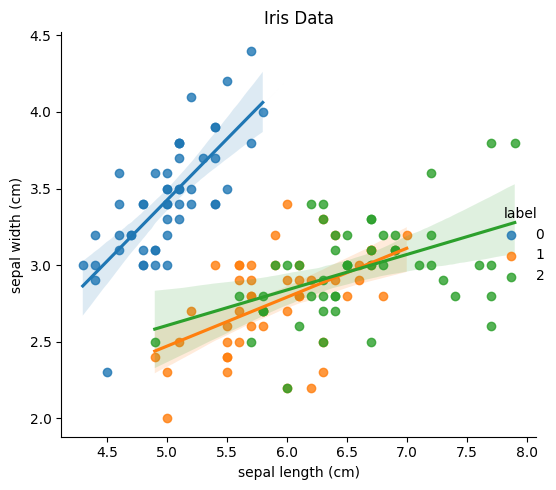

In [130]:
def show_iris():
    iris_data = load_iris()
    iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
    # add target column
    iris_df['label'] = iris_data.target
    print(iris_df)
    # Using seaborn to visualize iris dataset
    
    sns.lmplot(data = iris_df, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'label', fit_reg = True)
    plt.title('Iris Data')
    plt.tight_layout()
    plt.show()
# label: discrete, so categorization 
if __name__ == '__main__':
    show_iris()


In [131]:
def split_train_test():
    # 1. load data
    iris_data = load_iris()

    # 2. data preprocessing 
    x_train, x_test, y_train, y_test = train_test_split(
        iris_data.data, 
        iris_data.target, 
        test_size = 0.2, 
        random_state = 42)
    print(f'x_train: {len(x_train)}, {len(x_train[0])}')
    print(f'x_test: {len(x_test)}')
    print(len(y_train))
    print(len(y_test))
    # test size = 20%
    # x_train: 120 rows, 4 features
    # x_test: 30 rows, 4 features
    # y_train: 120 rows, 1 label
    # y_test: 30 rows, 1 label

if __name__ == '__main__':
    split_train_test()

x_train: 120, 4
x_test: 30
120
30


In [133]:
def train_data():

    # 1. Load Data
    iris = load_iris()
    x_train, x_test, y_train, y_test = train_test_split(
        iris_data.data, 
        iris_data.target, 
        test_size = 0.2, 
        random_state = 42)

    # 2. Preprocessing Data
    transfer = StandardScaler()  

    # fit_transform can both train and convert, apply to standardize data for the first time
    x_train_new = transfer.fit_transform(x_train)
    x_test_new = transfer.transform(x_test)

    # 3. Model Training
    estimator = KNeighborsClassifier(n_neighbors = 3)
    estimator.fit(x_train_new, y_train)

    # 4. Model Prediction
    y_pre = estimator.predict(x_test_new)
    print(f'The predicted value is {y_pre}')
    # Score 
    print(estimator.score(x_train_new, y_train))
    # Accuracy Score
    print(accuracy_score(y_test, y_pre))
train_data()

The predicted value is [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
0.9416666666666667
1.0
